In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)


In [4]:
model = Sequential([
    Embedding(10000, 64),   # Converts words to vectors
    SimpleRNN(64),          # Reads sequence step-by-step
    Dense(1, activation='sigmoid')  # Output layer
])


In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, epochs=3, batch_size=64,
                    validation_data=(x_test, y_test), verbose=1)

Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.6386 - loss: 0.6177 - val_accuracy: 0.7989 - val_loss: 0.4483
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8497 - loss: 0.3558 - val_accuracy: 0.7551 - val_loss: 0.5674
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8775 - loss: 0.2998 - val_accuracy: 0.8172 - val_loss: 0.4413


In [8]:
loss, acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {acc*100:.2f}%")


782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8154 - loss: 0.4480

Test Accuracy: 81.72%


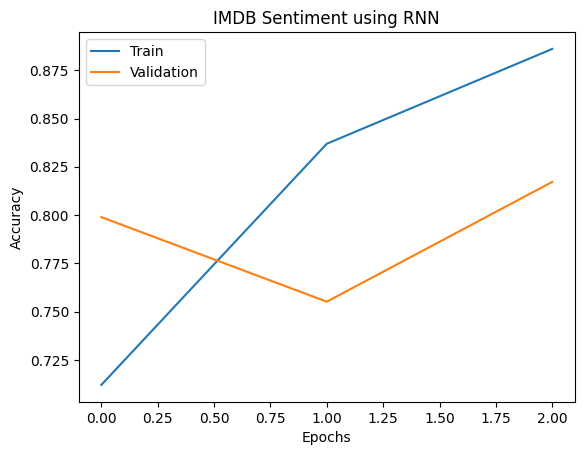

In [9]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('IMDB Sentiment using RNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [10]:
#lstm

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt


In [11]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [12]:
x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)


In [17]:
model = Sequential([
    Embedding(10000, 64),   # Converts word IDs into vectors
    LSTM(64),               # LSTM layer remembers word order
    Dense(1, activation='sigmoid')  # Output: positive or negative
])


In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test, y_test), verbose=1)


Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7043 - loss: 0.5432 - val_accuracy: 0.8630 - val_loss: 0.3473
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9064 - loss: 0.2425 - val_accuracy: 0.8626 - val_loss: 0.3262
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9273 - loss: 0.1917 - val_accuracy: 0.8690 - val_loss: 0.3452


In [23]:
loss, acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {acc*100:.2f}%")


782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8667 - loss: 0.3538

Test Accuracy: 86.90%


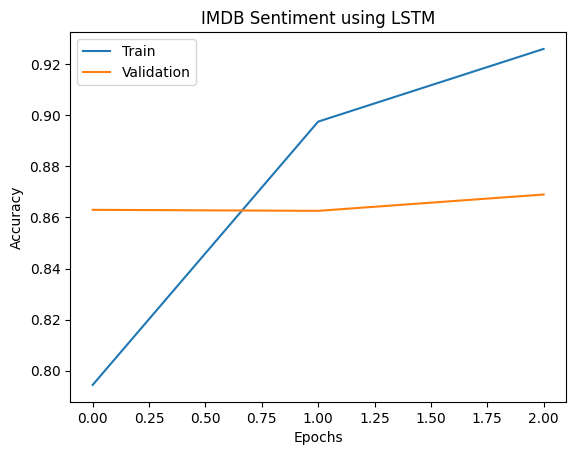

In [24]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('IMDB Sentiment using LSTM')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
